In [1]:
%matplotlib inline 
import matplotlib.pylab
import pandas as pd
import numpy as np

# Pandas data frames make data easy to see, references, and manipulate

very much copied from
http://pandas.pydata.org/pandas-docs/stable/10min.html

### You can create a data frame with a dictionary of lists

In [2]:
students = pd.DataFrame({'phone': ['555-1212', '555-1234', '555-1111', '555-2222'], 'age':[17, 17, 18, 18]}, index = ['Melanie', 'Bob', 'Vidhya', 'Ming'])
students

,age,phone
Melanie,17,555-1212
Bob,17,555-1234
Vidhya,18,555-1111
Ming,18,555-2222


In [3]:
students.index

Index([u'Melanie', u'Bob', u'Vidhya', u'Ming'], dtype='object')

### You can also create a data frame with a numpy array and some column names

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=['Jenny', 'Frank', 'Wenfei', 'Arun', 'Mary', 'Ivan'], columns=list('ABCD'))
df

,A,B,C,D
Jenny,0.986188,1.214779,-0.492965,0.681175
Frank,0.749803,-0.290769,-1.546993,-0.504559
Wenfei,-1.164897,-0.715890,-0.484121,-0.080555
Arun,0.634735,0.439997,-0.052669,0.991228
Mary,-0.178971,0.813073,-0.516568,0.316246
Ivan,-1.275941,-0.146480,0.846364,-0.468104


### There are also Series, which gets you all the functionality of a data frame when you have a 1-dimensional set of data with an index

In [5]:
s = pd.Series([1,3,5,np.nan,6,8])

In [6]:
s.index = ['a', 'b', 'c', 'd', 'e', 'f']
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [7]:
s.isnull()

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

### Dataframes and series play nice with plotting

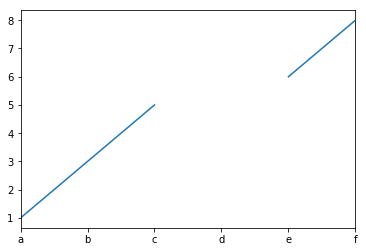

In [8]:
s.plot()

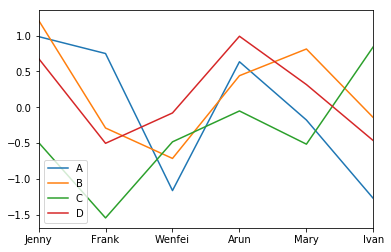

In [9]:
df.plot()

### Once you have a data frame, it's easy to see portions of your data that match what you want (same goes for series)

In [10]:
s[s.index > 'c']

d    NaN
e    6.0
f    8.0
dtype: float64

In [11]:
s[s.isnull() == False]

a    1.0
b    3.0
c    5.0
e    6.0
f    8.0
dtype: float64

In [12]:
students['age']

Melanie    17
Bob        17
Vidhya     18
Ming       18
Name: age, dtype: int64

In [13]:
students.age

Melanie    17
Bob        17
Vidhya     18
Ming       18
Name: age, dtype: int64

In [14]:
# 'selection by label'
students.loc['Melanie']

age            17
phone    555-1212
Name: Melanie, dtype: object

In [15]:
students.loc['Melanie', ['age', 'grades']]

age        17
grades    NaN
Name: Melanie, dtype: object

In [16]:
# select by position
students.iloc[1, :]

age            17
phone    555-1234
Name: Bob, dtype: object

In [17]:
students[students['age'] > 17]

,age,phone
Vidhya,18,555-1111
Ming,18,555-2222


### It's also easy to summarize your data

In [18]:
students.age.mean()

17.5

In [19]:
students.age.max()

18

In [20]:
students.age.min()

17

### You can add information to an existing data frame

In [21]:
students['grade'] = [100, 97, 80, 85]

In [22]:
students[students['grade'] == students['grade'].max()]

,age,phone,grade
Melanie,17,555-1212,100


### You can also easily aggregate information

In [23]:
students.groupby('age').grade.mean()

age
17    98.5
18    82.5
Name: grade, dtype: float64

### You can even create categories to aggregate with on-the-fly

In [24]:
bins = np.linspace(70, 100, 3)
bins
students.groupby(np.digitize(students.grade, bins)).age.mean()

1    18.0
2    17.5
3    17.0
Name: age, dtype: float64

### Finally applying functions is also quite straight-forward

In [25]:
# First let's see what a lambda function looks like / does
f = lambda x: x + 1

In [26]:
f(4)

5

In [27]:
students.age.apply(lambda age: age + 1)

Melanie    18
Bob        18
Vidhya     19
Ming       19
Name: age, dtype: int64

### Let's take a look at some built methods we might want to apply

In [28]:
students.age.mean()

17.5

In [29]:
students.age.count()

4

In [30]:
students.corr()

,age,grade
age,1.000000,-0.968364
grade,-0.968364,1.000000


In [31]:
students.cummax()

,age,phone,grade
Melanie,17,555-1212,100
Bob,17,555-1234,100
Vidhya,18,555-1234,100
Ming,18,555-2222,100
